In [3]:
import pandas as pd
import re
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset


# Load Data

In [4]:
df = pd.read_csv("phishing_email.csv")
df.shape

(82486, 2)

# Preprocessing

In [5]:
# Remove nulls
df.dropna(inplace=True)
df['label'] = df['label'].astype(int)

# Make lowercase
def lowercase_text(text):
    return text.lower()

df['text_combined'] = df['text_combined'].apply(lowercase_text)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None


In [7]:
df.shape

(82486, 2)

In [8]:
df.tail()

,text_combined,label
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1
82485,fastway infofastwaycoza_infofastwaycoza_infofa...,1


# Data Visualization

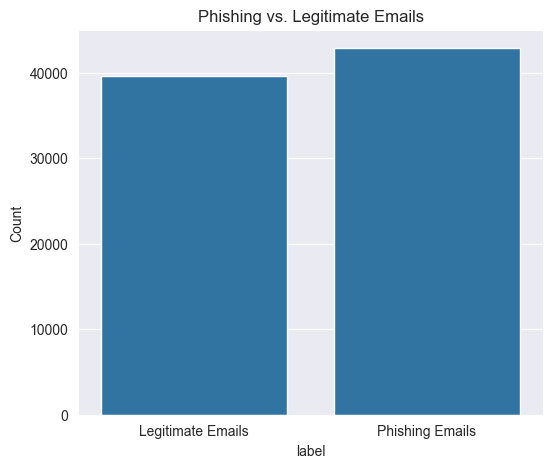

In [9]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='label')
plt.title('Phishing vs. Legitimate Emails')
plt.xticks([0,1],['Legitimate Emails', 'Phishing Emails'])
plt.ylabel('Count')
plt.show()

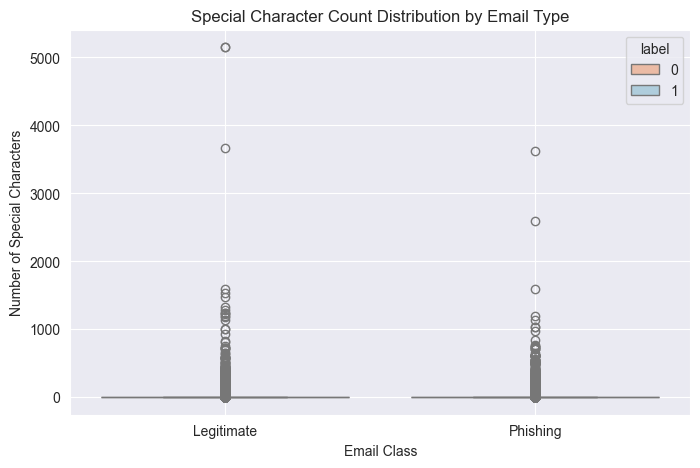

In [10]:
# Count special characters in each email
df['special_chars'] = df['text_combined'].apply(
    lambda x: sum(not c.isalnum() and not c.isspace() for c in x)
)

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='label',
    y='special_chars',
    data=df,
    hue='label',
    palette='RdBu',
    dodge=False
)

# Label formatting
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.title('Special Character Count Distribution by Email Type')
plt.xlabel('Email Class')
plt.ylabel('Number of Special Characters')
plt.grid(True)
plt.show()


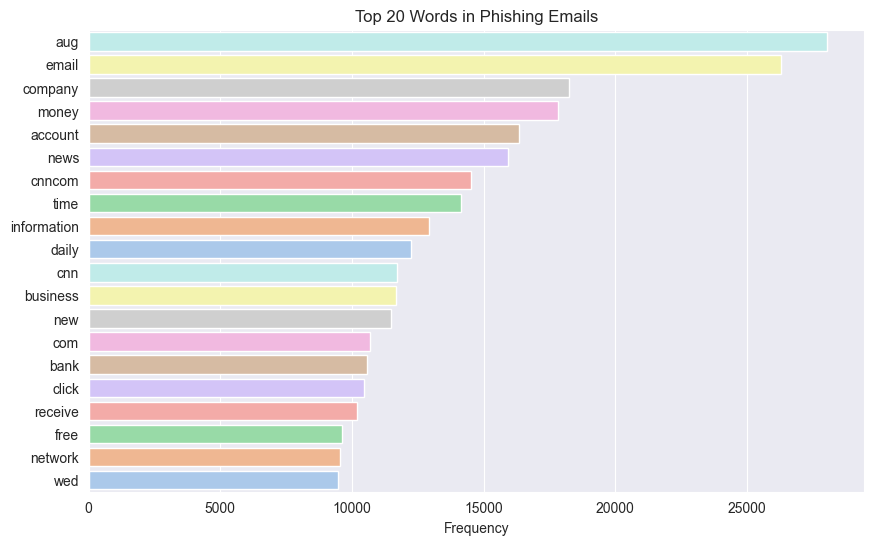

In [11]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Use built-in English stopwords from scikit-learn
stop_words = set(ENGLISH_STOP_WORDS)

# Combine all phishing email texts into a single list of lowercase words
phishing_words = ' '.join(df[df['label'] == 1]['text_combined']).lower().split()

# Filter out non-alphabetic tokens and stopwords
filtered_words = [word for word in phishing_words if word.isalpha() and word not in stop_words]

# Count the frequency of the top 20 most common words
word_freq = Counter(filtered_words).most_common(20)

# Split the word-frequency pairs into separate lists for plotting
words, counts = zip(*word_freq)

# Create a horizontal bar plot of the top 20 words in phishing emails
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), hue=list(counts), palette='pastel', legend=False)
plt.title('Top 20 Words in Phishing Emails')
plt.xlabel('Frequency')
plt.show()


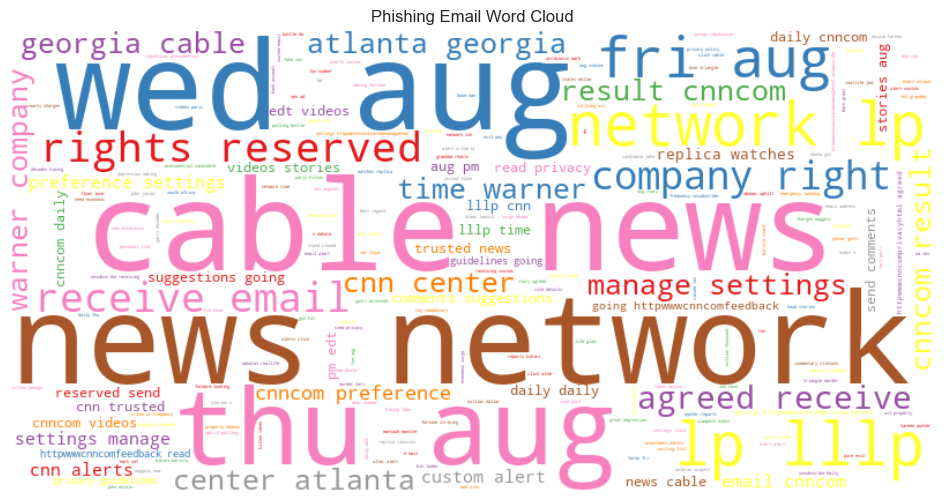

In [12]:
from wordcloud import WordCloud

# Join all filtered phishing words into a single string
wordcloud_text = ' '.join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set1').generate(wordcloud_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Phishing Email Word Cloud')
plt.show()